In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

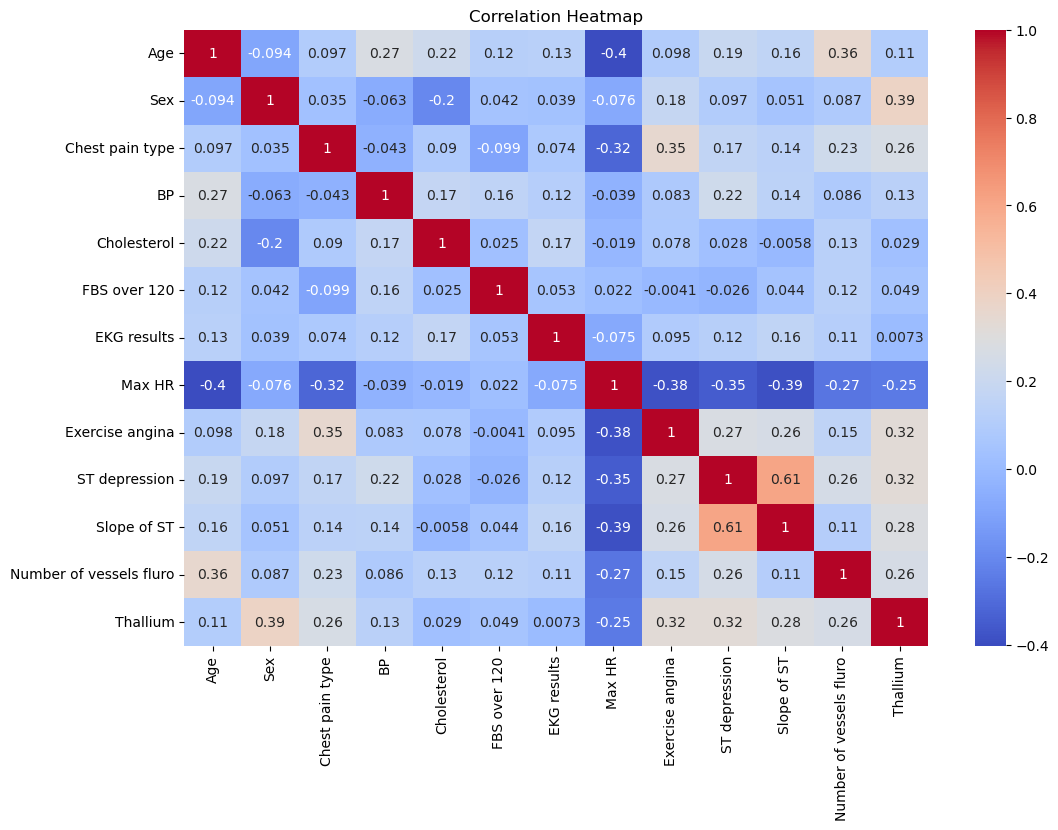

In [8]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression
print("\n🔹 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Performance:
Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [22]:
#Decision Tree
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("\n🔹 Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


🔹 Decision Tree Performance:
Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

     Absence       0.76      0.76      0.76        33
    Presence       0.62      0.62      0.62        21

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



In [27]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' for better performance
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
print("\n🔹 KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


🔹 KNN Performance:
Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

     Absence       0.81      0.91      0.86        33
    Presence       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54



In [28]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\n🔹 Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Performance:
Accuracy: 0.7592592592592593
              precision    recall  f1-score   support

     Absence       0.78      0.85      0.81        33
    Presence       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54



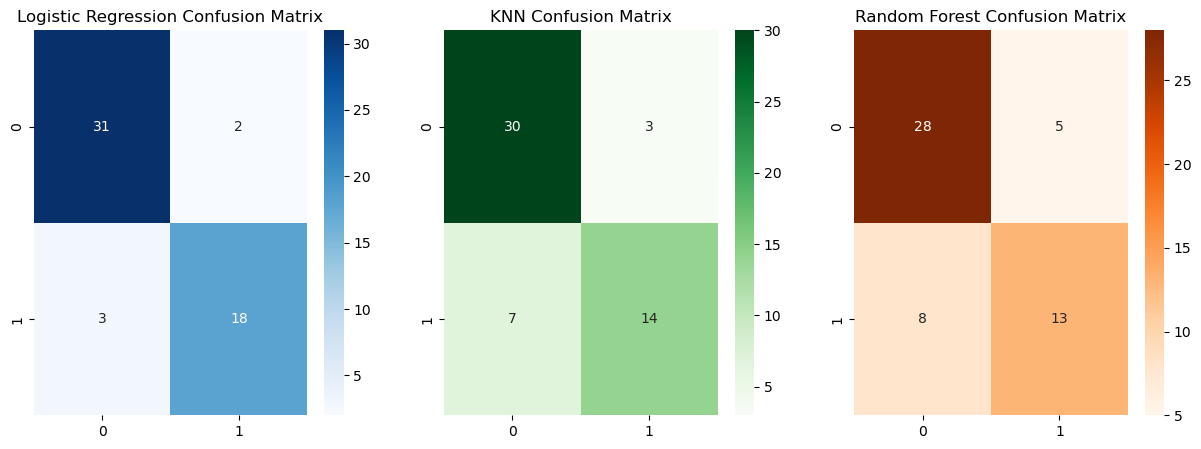

In [29]:
# 🔹 Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

# KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("KNN Confusion Matrix")

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("Random Forest Confusion Matrix")

plt.show()

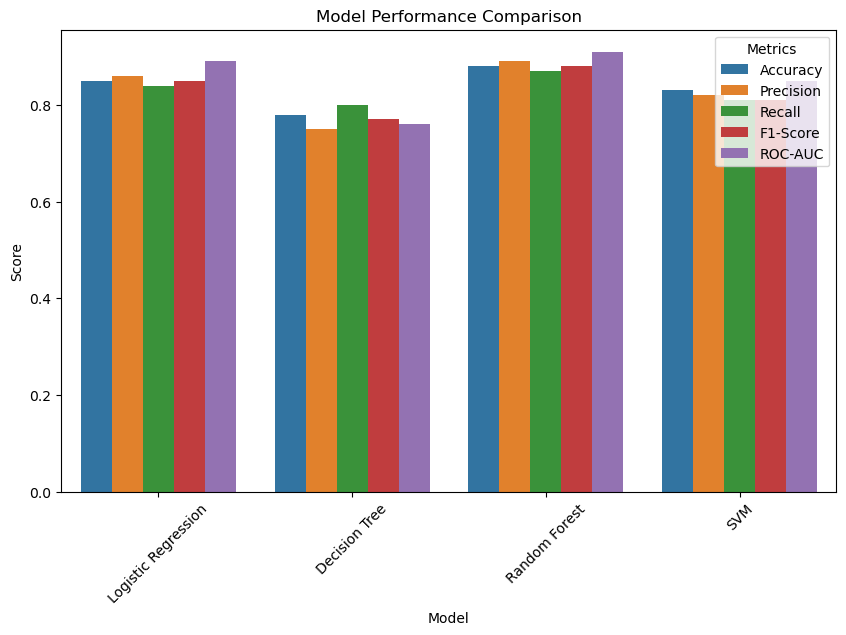

In [18]:
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [0.85, 0.78, 0.88, 0.83],
    "Precision": [0.86, 0.75, 0.89, 0.82],
    "Recall": [0.84, 0.80, 0.87, 0.81],
    "F1-Score": [0.85, 0.77, 0.88, 0.81],
    "ROC-AUC": [0.89, 0.76, 0.91, 0.85]
})

# Plot the performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=model_performance.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()